In [1]:
# Import Main Dependencies
import pandas as pd
import json
import requests
from pprint import pprint
import datetime as dt
import matplotlib.pyplot as plt
#import scipy.stats as st

# Import credentials string for PostgreSQL database access
from config import credentials

# Library and methods to connect and interact with database
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import Session
from sqlalchemy.orm import sessionmaker

#import geoapify api key
from config_api import geoapify_api_key


# Getting Lobbyist Data using API calls

In [2]:
# API Call 1 - Contribution table: Get full dataset

# save endpoint url - all records
url_two = 'https://data.cityofchicago.org/resource/p9p7-vfqc.json?$limit=10000'

# save endpoint response in json format
api_full_response_two = requests.get(url_two).json()

In [3]:
# API Call 1 - Contribution table: loop and store response

# Creating empty list to store response
lobbyist_combo_list_two = []

#looping through all api response to extract fields 
for lobbyist_record in api_full_response_two:
    
    #try/except logic to avoid errors
    try:
        contribution_id = lobbyist_record['contribution_id']
        period_start = lobbyist_record['period_start']
        period_end = lobbyist_record['period_end']
        contribution_date = lobbyist_record['contribution_date']
        recipient = lobbyist_record['recipient']
        amount = lobbyist_record['amount']
        lobbyist_id = lobbyist_record['lobbyist_id']
        lobbyist_first_name = lobbyist_record['lobbyist_first_name']
        lobbyist_last_name = lobbyist_record['lobbyist_last_name']
        created_date = lobbyist_record['created_date']
        
        lobbyist_combo_list_two.append({"contribution_id" : contribution_id,
                        "period_start" : period_start,
                        "period_end": period_end,
                        "contribution_date" : contribution_date,
                        "recipient" : recipient,      
                        "amount" : amount,
                        "lobbyist_id" : lobbyist_id,      
                        "lobbyist_first_name" : lobbyist_first_name,
                        "lobbyist_last_name": lobbyist_last_name,
                        "created_date" : created_date,
                       
                        })
    
    except:
        print(f'found empty data for lobbyist name {lobbyist_last_name}')
        pass
        
    
    #print(lobbyist_last_name)
    
    # adding extracted data into python list 

    
print("Data Retrieval Complete")

Data Retrieval Complete


In [4]:
# API Call 2 - Compensation table: Get full dataset

# save endpoint url - all records
url = 'https://data.cityofchicago.org/resource/dw2f-w78u.json?$limit=30000'

# save endpoint response in json format
api_full_response = requests.get(url).json()

# pprint(json.dumps(api_full_response, indent=4, sort_keys=True))


In [5]:
# API Call 2 - Compensation table:: loop and store response

# Creating empty list to store response
compensation_list = []

err_num = 0

#looping through all api data to extract fields
for compensation_record in api_full_response:
   
    #try/except logic to avoid errors
    try:
        client_id = compensation_record['client_id']
        client_name = compensation_record['client_name']
        compensation_amount = compensation_record['compensation_amount']
        compensation_id = compensation_record['compensation_id']
        lobbyist_first_name = compensation_record['lobbyist_first_name']
        lobbyist_id = compensation_record['lobbyist_id']
        lobbyist_last_name = compensation_record['lobbyist_last_name']
        lobbyist_middle_initial = compensation_record['lobbyist_middle_initial']
        period_end = compensation_record['period_end']
        period_start = compensation_record['period_start']
        
           
    # adding extracted data into python list
        compensation_list.append({"client_id" : client_id,
                        "client_name" : client_name,
                        "compensation_amount": compensation_amount,
                        "compensation_id" : compensation_id,
                        "lobbyist_first_name" : lobbyist_first_name,
                        "lobbyist_id" : lobbyist_id,
                        "lobbyist_last_name": lobbyist_last_name,
                        "lobbyist_middle_initial" : lobbyist_middle_initial,
                        "period_end" : period_end,
                        "period_start" : period_start,
                        })
       
    except:
        # print(f'found empty data for compensation ID {compensation_id}')
        err_num = err_num + 1
        pass

   
print(f"Data Retrieval Complete. {err_num} records had some missing data")


Data Retrieval Complete. 11466 records had some missing data


In [6]:
# API Call 3 - Lobbyist table: Get full dataset

# save endpoint url - all records
url = 'https://data.cityofchicago.org/resource/tq3e-t5yq.json?$limit=15000'

# save endpoint response in json format
api_packed_response = requests.get(url).json()


In [7]:
# API Call 3 - Lobbyist table: loop and store response

# Creating empty list to store response
lobby_record_list = []

# looping through all api data to extract fields
for lobby_record in api_packed_response:
    
    #try/except logic to avoid errors
    try:
        address_1 = lobby_record['address_1']
        city = lobby_record['city']
        country = lobby_record['country']
        created_date = lobby_record['created_date']
        email = lobby_record['email']
        employer_id = lobby_record['employer_id']
        employer_name = lobby_record['employer_name']
        fax = lobby_record['fax']
        first_name = lobby_record['first_name']
        last_name = lobby_record['last_name']
        lobbyist_id = lobby_record['lobbyist_id']
        phone = lobby_record['phone']
        salutation = lobby_record['salutation']
        state =  lobby_record['state']
        year = lobby_record['year']
        zip = lobby_record['zip']
        
            # adding extracted data into python list
        lobby_record_list.append({"address_1" : address_1,
                              "city" : city,
                              "country" : country,
                              "created_date" : created_date,
                              "email" : email,
                              "employer_id" : employer_id,
                              "employer_name" : employer_name,
                              "fax" : fax,
                              "first_name" : first_name,
                              "last_name":  last_name,
                              "lobbyist_id" : lobbyist_id,
                              "phone": phone,
                              "salutation": salutation,
                              "state": state,
                              "year" : year,
                              "zip" : zip                        
                            })
                       
    except:
        #print(f'found empty data for lobbyist name {last_name}')
        pass
        


print("Data Retrieval Complete")

# inspect counts
# convert numeric types to int
# verify data types were converted to int

Data Retrieval Complete


# Creating Dataframes for all Lobbyist datasets

## Lobbyists Dataframe

In [8]:
# create Lobbyist dataframe 
lobby_record_df = pd.DataFrame(lobby_record_list)
lobby_record_df.head()

,address_1,city,country,created_date,email,employer_id,employer_name,fax,first_name,last_name,lobbyist_id,phone,salutation,state,year,zip
0,6969 W WABANSIA AVE,CHICAGO,United States,2021-02-03T00:00:00.000,Pericles@UChicago.edu,2281637536,THE PERICLES ORGANIZATION,(773) 309-8884,PERICLES,ABBASI,18883,(773) 368-5423,MR.,IL,2021,60707
1,6969 W WABANSIA AVE,CHICAGO,United States,2020-08-07T00:00:00.000,Pericles@UChicago.edu,2281637536,THE PERICLES ORGANIZATION,(773) 309-8884,PERICLES,ABBASI,18883,(773) 368-5423,MR.,IL,2020,60707
2,222 W. ADAMS ST.,CHICAGO,United States,2017-01-17T00:00:00.000,dabel@williamblair.com,3938395334,WILLIAM BLAIR AND CO.,312-236-0174,DAVID,ABEL,3998,312-236-1600,MR.,IL,2017,60606
3,222 W. ADAMS ST.,CHICAGO,United States,2016-01-19T00:00:00.000,dabel@williamblair.com,3938395334,WILLIAM BLAIR AND CO.,312-236-0174,DAVID,ABEL,3998,312-236-1600,MR.,IL,2016,60606
4,222 W. ADAMS ST.,CHICAGO,United States,2015-01-14T00:00:00.000,dabel@williamblair.com,3938395334,WILLIAM BLAIR AND CO.,312-236-0174,DAVID,ABEL,3998,312-236-1600,MR.,IL,2015,60606


In [9]:
# inspect counts to ensure all records retrieved (the limit set in the API Call must be higher than returned count here)
lobby_record_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3005 entries, 0 to 3004
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   address_1      3005 non-null   object
 1   city           3005 non-null   object
 2   country        3005 non-null   object
 3   created_date   3005 non-null   object
 4   email          3005 non-null   object
 5   employer_id    3005 non-null   object
 6   employer_name  3005 non-null   object
 7   fax            3005 non-null   object
 8   first_name     3005 non-null   object
 9   last_name      3005 non-null   object
 10  lobbyist_id    3005 non-null   object
 11  phone          3005 non-null   object
 12  salutation     3005 non-null   object
 13  state          3005 non-null   object
 14  year           3005 non-null   object
 15  zip            3005 non-null   object
dtypes: object(16)
memory usage: 375.8+ KB


In [10]:
# convert numeric types to int

lobby_record_df['year'] = lobby_record_df['year'].astype('int')
lobby_record_df['employer_id'] = lobby_record_df['employer_id'].astype('int64')
lobby_record_df['lobbyist_id'] = lobby_record_df['lobbyist_id'].astype('int')

# perform Dataframe date formatting (if necessary)

In [11]:
# verify data types were converted to int
lobby_record_df.dtypes

address_1        object
city             object
country          object
created_date     object
email            object
employer_id       int64
employer_name    object
fax              object
first_name       object
last_name        object
lobbyist_id       int32
phone            object
salutation       object
state            object
year              int32
zip              object
dtype: object

In [ ]:

# drop unnecessary columns example
#lobby_record_no_dups_df = lobby_record_reordered_df.drop('lobbyist_id', axis=1)
#lobby_record_no_dups_df.head()
#TESTING

# for i in lobby_record_list:
#     print(i['address_1'])
    
# for x in lobby_record_df:
#     print(x)

lobby_record_df

In [12]:
# Find duplicate IDs
#print(lobby_record_df.count())

#lobby_record_df['lobbyist_id'].duplicated()
lobby_record_df['lobbyist_id'].duplicated().sum()

# drop duplicate ids

2342

## Contributions Dataframe

In [20]:
# Create this dataset dataframe 
lobbyist_combo_df_two = pd.DataFrame(lobbyist_combo_list_two)
lobbyist_combo_df_two['period_end'] = pd.to_datetime(lobbyist_combo_df_two['period_end'])
lobbyist_combo_df_two['period_start'] = pd.to_datetime(lobbyist_combo_df_two['period_start'])
lobbyist_combo_df_two['contribution_date'] = pd.to_datetime(lobbyist_combo_df_two['contribution_date'],errors = "coerce")
lobbyist_combo_df_two['period_end']=lobbyist_combo_df_two['period_end'].dt.strftime('%m/%d/%y')
lobbyist_combo_df_two['period_start'] = lobbyist_combo_df_two['period_start'].dt.strftime('%m/%d/%y')
lobbyist_combo_df_two['contribution_date'] = lobbyist_combo_df_two['contribution_date'].dt.strftime('%m/%d/%y')
lobbyist_combo_df_two.head()

,contribution_id,period_start,period_end,contribution_date,recipient,amount,lobbyist_id,lobbyist_first_name,lobbyist_last_name,created_date
0,1223522085,10/01/22,12/31/22,01/26/23,0,0,25242,ISSAC,RIGGS,2023-01-26T00:00:00.000
1,2211044450,10/01/22,12/31/22,01/13/23,JESSICA GUTIERREZ FOR ALDERPERSON,500,24632,JUAN,CALDERON CUZA,2023-01-25T00:00:00.000
2,2693378230,10/01/22,12/31/22,01/08/23,GREG MITCHELL,500,13761,MICHAEL,AXELROD,2023-01-08T00:00:00.000
3,2647888166,10/01/22,12/31/22,12/31/22,FRIENDS OF RONNIE MOSLEY,500,18181,JOHN,DALEY,2023-01-19T00:00:00.000
4,1715160815,10/01/22,12/31/22,12/31/22,NONE,0,3979,JOHN,SUZUKI,2023-01-17T00:00:00.000


In [14]:
lobbyist_combo_df_two['contribution_date'].isna().sum()

14

In [21]:
# inspect data types
lobbyist_combo_df_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5642 entries, 0 to 5641
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   contribution_id      5642 non-null   object
 1   period_start         5642 non-null   object
 2   period_end           5642 non-null   object
 3   contribution_date    5628 non-null   object
 4   recipient            5642 non-null   object
 5   amount               5642 non-null   object
 6   lobbyist_id          5642 non-null   object
 7   lobbyist_first_name  5642 non-null   object
 8   lobbyist_last_name   5642 non-null   object
 9   created_date         5642 non-null   object
dtypes: object(10)
memory usage: 440.9+ KB


In [17]:
# inspect counts to ensure all records are retrieved (the limit in API Call must be higher than returned count here)
lobbyist_combo_df_two.count()


contribution_id        5642
period_start           5642
period_end             5642
contribution_date      5628
recipient              5642
amount                 5642
lobbyist_id            5642
lobbyist_first_name    5642
lobbyist_last_name     5642
created_date           5642
dtype: int64

In [18]:
#  Which "Lobbyist" is receiving the most lobbying funds?
lobbyist_combo_df_two['lobbyist_id'] = lobbyist_combo_df_two['lobbyist_id'].astype(int)
lobbyist_combo_df_two['amount'] = lobbyist_combo_df_two['amount'].astype(float)
most_funds_received_lobbyist = lobbyist_combo_df_two.groupby(["lobbyist_last_name"])["amount"].sum()
lobbyist_high = most_funds_received_lobbyist.sort_values(ascending=False)
lobbyist_high =lobbyist_high.head(30)


In [19]:
# inspect Contributions dataframe data types
lobbyist_combo_df_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5642 entries, 0 to 5641
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   contribution_id      5642 non-null   object 
 1   period_start         5642 non-null   object 
 2   period_end           5642 non-null   object 
 3   contribution_date    5628 non-null   object 
 4   recipient            5642 non-null   object 
 5   amount               5642 non-null   float64
 6   lobbyist_id          5642 non-null   int32  
 7   lobbyist_first_name  5642 non-null   object 
 8   lobbyist_last_name   5642 non-null   object 
 9   created_date         5642 non-null   object 
dtypes: float64(1), int32(1), object(8)
memory usage: 418.9+ KB


Text(0, 0.5, 'lobbyist_high')

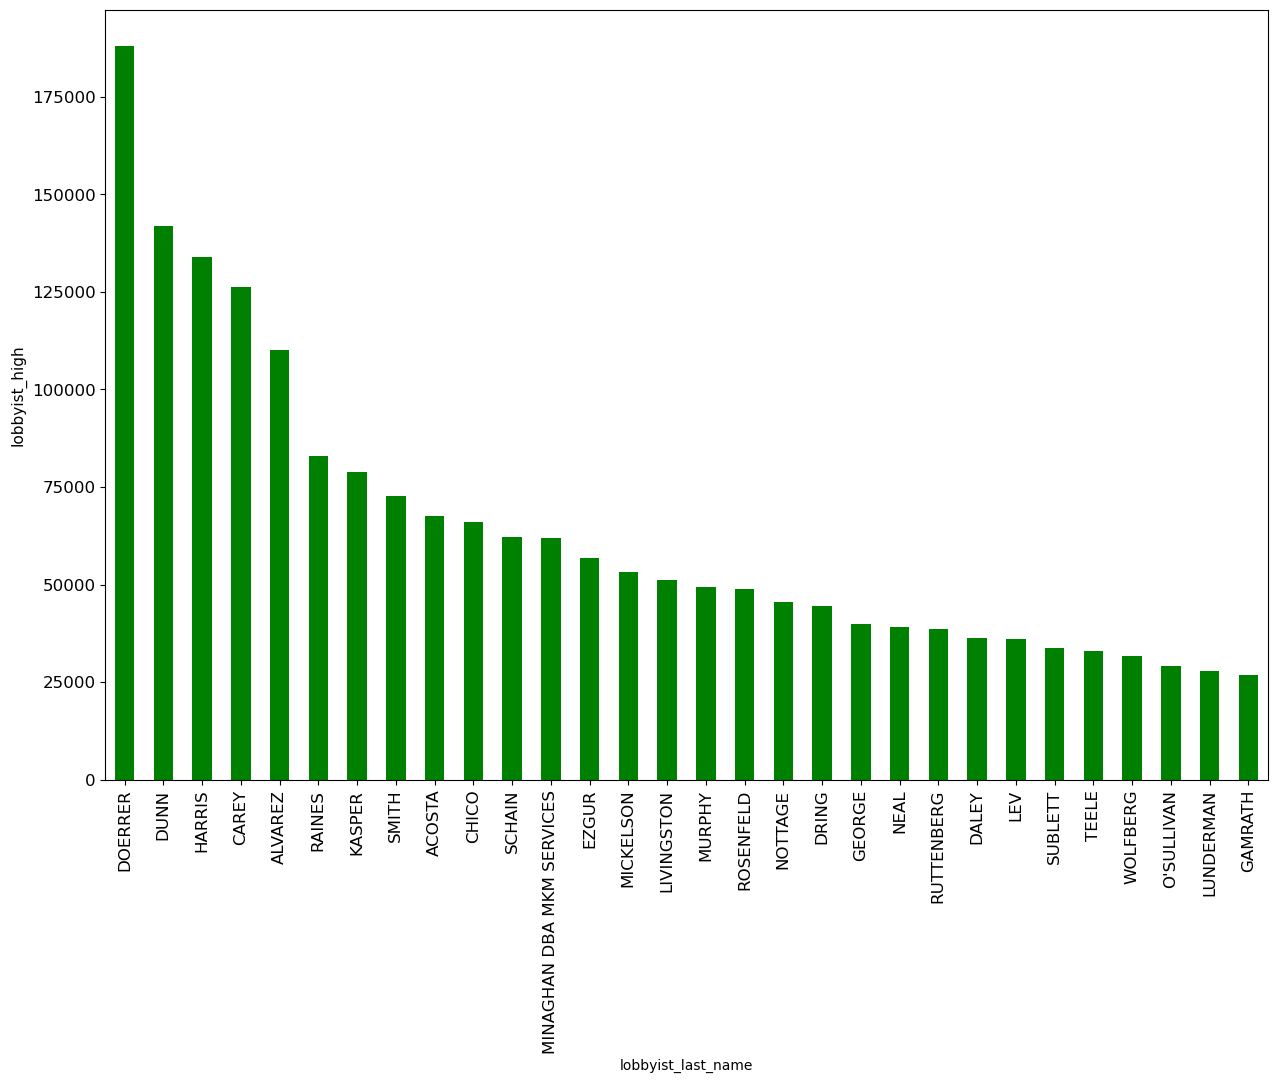

In [22]:
# Bar Plot (Using Pandas): lobbyist Vs amount
plot_pandas = lobbyist_high.plot.bar(figsize = (15,10), color = 'g', fontsize = 12)
plt.ylabel("lobbyist_high", fontsize =11)

In [23]:
#  Which "recipient" is receiving the most lobbying funds in descending order
lobbyist_combo_df_two['amount'] = lobbyist_combo_df_two['amount'].astype(float)
most_funds_received_recipient = lobbyist_combo_df_two.groupby(["recipient"])["amount"].sum()
recipient_high = most_funds_received_recipient.sort_values(ascending=False)
recipient_high =recipient_high.head(30)

Text(0, 0.5, 'recipient_high')

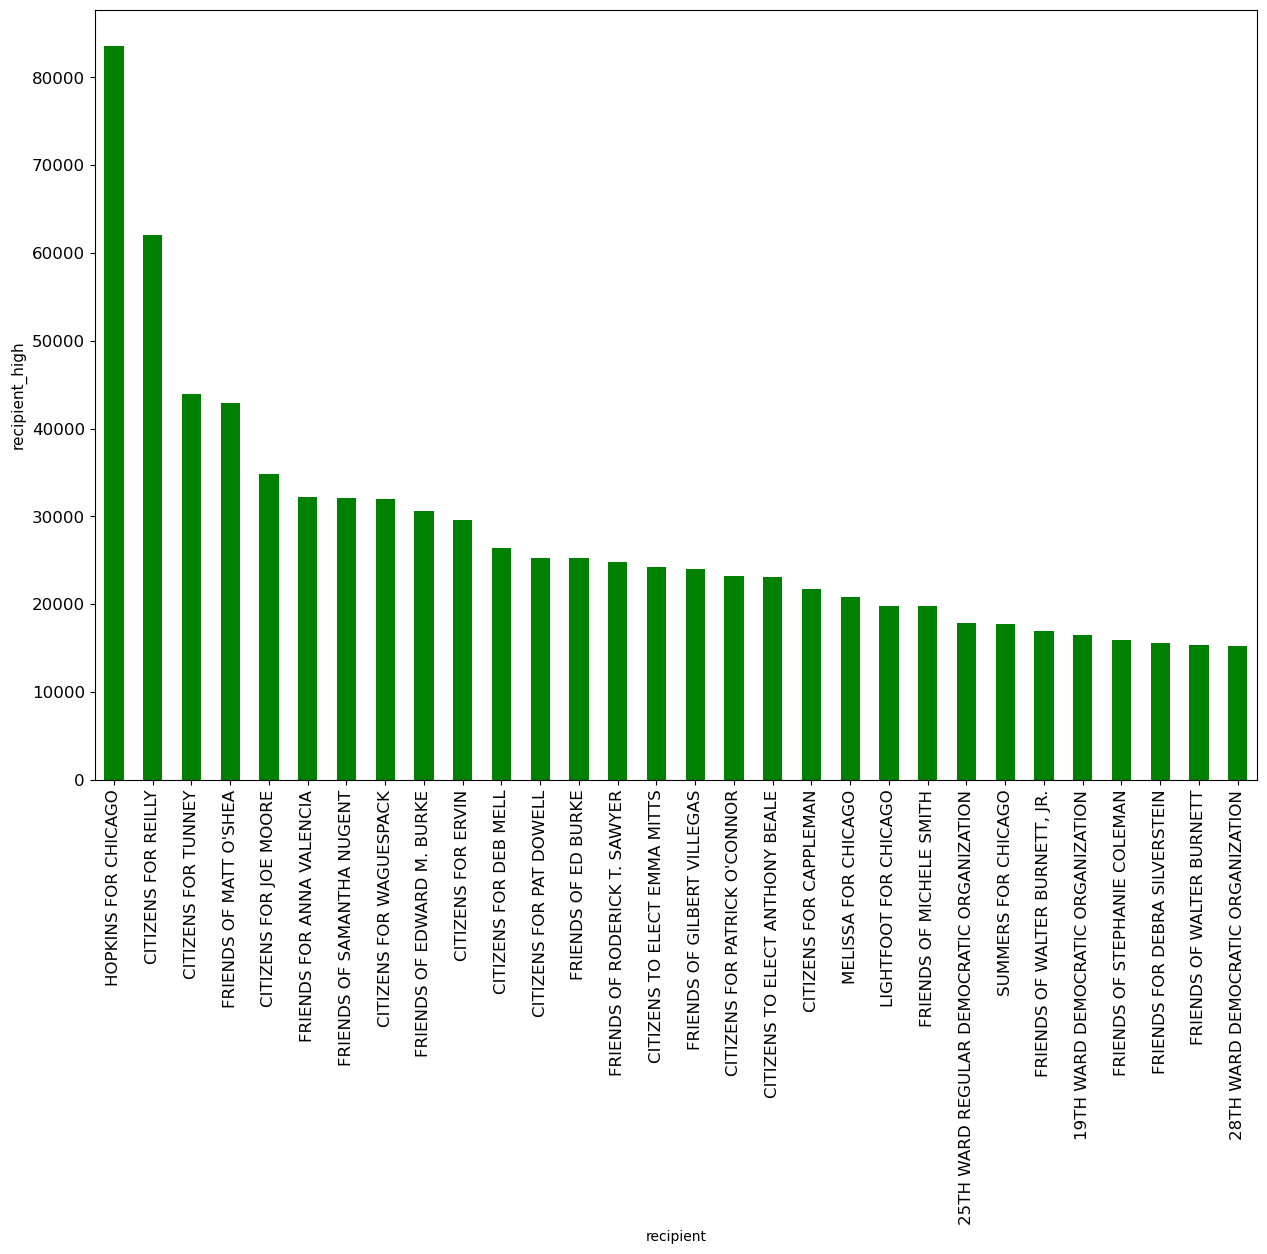

In [24]:
# Bar Plot (Using Pandas): recipient Vs amount
plot_pandas = recipient_high.plot.bar(figsize = (15,10), color = 'g', fontsize = 12)
plt.ylabel("recipient_high", fontsize =11)

In [25]:
# Convert dataframe to json file
lobbyist_combo_df_two.to_json('data/lobbyist_contribution_info.json',orient ='records')

# Another way
# with open("data/compensation.json", "w") as outfile:
#     json.dump(compensation_df_to_json_dict, outfile)

## Compensation Dataframe

In [26]:
# Create compensation dataframe
compensation_df = pd.DataFrame(compensation_list)
compensation_df.head()

,client_id,client_name,compensation_amount,compensation_id,lobbyist_first_name,lobbyist_id,lobbyist_last_name,lobbyist_middle_initial,period_end,period_start
0,498976702,ANHEUSER BUSCH COMPANIES,15000,1473879510,TERRY,3912,GABINSKI,M,2023-03-31T00:00:00.000,2023-01-01T00:00:00.000
1,3647804913,BLOUNTS & MOORE LLC,8000,245680987,ROLANDO,3845,ACOSTA,R,2022-12-31T00:00:00.000,2022-10-01T00:00:00.000
2,3800662852,URUAPAN PROPERTIES LLC,4000,1144290406,ROLANDO,3845,ACOSTA,R,2022-12-31T00:00:00.000,2022-10-01T00:00:00.000
3,3715055191,FULL PARK LLC,25000,2597405270,ROLANDO,3845,ACOSTA,R,2022-12-31T00:00:00.000,2022-10-01T00:00:00.000
4,1579900655,LINCOLN SQUARE DEVELOPMENT GROUP LLC,3000,2823192968,ROLANDO,3845,ACOSTA,R,2022-12-31T00:00:00.000,2022-10-01T00:00:00.000


In [27]:
# Compensation Dataframe date formatting
compensation_df['period_end'] = pd.to_datetime(compensation_df['period_end'])
compensation_df['period_start'] = pd.to_datetime(compensation_df['period_start'])

compensation_df.head()

,client_id,client_name,compensation_amount,compensation_id,lobbyist_first_name,lobbyist_id,lobbyist_last_name,lobbyist_middle_initial,period_end,period_start
0,498976702,ANHEUSER BUSCH COMPANIES,15000,1473879510,TERRY,3912,GABINSKI,M,2023-03-31,2023-01-01
1,3647804913,BLOUNTS & MOORE LLC,8000,245680987,ROLANDO,3845,ACOSTA,R,2022-12-31,2022-10-01
2,3800662852,URUAPAN PROPERTIES LLC,4000,1144290406,ROLANDO,3845,ACOSTA,R,2022-12-31,2022-10-01
3,3715055191,FULL PARK LLC,25000,2597405270,ROLANDO,3845,ACOSTA,R,2022-12-31,2022-10-01
4,1579900655,LINCOLN SQUARE DEVELOPMENT GROUP LLC,3000,2823192968,ROLANDO,3845,ACOSTA,R,2022-12-31,2022-10-01


In [28]:
# reorder fields in dataframe
compensation_df = compensation_df[['lobbyist_id', 'lobbyist_first_name','lobbyist_middle_initial','lobbyist_last_name',
                                   'client_id','client_name','compensation_id','compensation_amount','period_start','period_end']]

In [29]:
# Compensation Dataframe Inspect counts
compensation_df.count()

lobbyist_id                18451
lobbyist_first_name        18451
lobbyist_middle_initial    18451
lobbyist_last_name         18451
client_id                  18451
client_name                18451
compensation_id            18451
compensation_amount        18451
period_start               18451
period_end                 18451
dtype: int64

In [30]:
# Compensation Dataframe Inspect datatypes
compensation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18451 entries, 0 to 18450
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   lobbyist_id              18451 non-null  object        
 1   lobbyist_first_name      18451 non-null  object        
 2   lobbyist_middle_initial  18451 non-null  object        
 3   lobbyist_last_name       18451 non-null  object        
 4   client_id                18451 non-null  object        
 5   client_name              18451 non-null  object        
 6   compensation_id          18451 non-null  object        
 7   compensation_amount      18451 non-null  object        
 8   period_start             18451 non-null  datetime64[ns]
 9   period_end               18451 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(8)
memory usage: 1.4+ MB


In [31]:
# Compensation Dataframe update datatypes
compensation_df['compensation_amount'] = compensation_df['compensation_amount'].astype(float)

# Load and Store datasets into PostgreSQL Database

In [32]:
# CONNECT TO POSTGRESQL DATABASE

# create connection string for accessing PostgreSQL database
conn_string = f"postgresql://{credentials}@localhost:5432/lobbyist_db"  

In [33]:
# Create sqlalchemy engine using connection string
engine = create_engine(conn_string)
conn = engine.connect()

In [ ]:
# SAMPLE writing to file
# with open("sample.json", "w") as outfile:
#     json.dump(bulk_insert_dict, outfile)

In [34]:
# Create and bind sqlalchemy table objects 

# table_name = 'lobbyist_employer_client_rel' -- This table is no longer used.
table_name1 = 'contribution'
table_name2 = 'compensation'
table_name3 = 'lobbyists'

metadata = sqlalchemy.schema.MetaData(bind=engine)

table1 = sqlalchemy.Table(table_name1, metadata, autoload=True)
table2 = sqlalchemy.Table(table_name2, metadata, autoload=True)
table3 = sqlalchemy.Table(table_name3, metadata, autoload=True)

In [35]:
# start session
Session = sessionmaker(bind=engine)

In [36]:
#Table 1
# Bulk Insert the dataframe into the database table

with Session() as session:
    lobbyist_combo_df_two.to_sql(table_name1, con=conn, if_exists='append', index=False)

In [37]:
#Table 2
# Bulk Insert the dataframe into the database table

with Session() as session:
    compensation_df.to_sql(table_name2, con=conn, if_exists='append', index=False)

In [38]:
#Table 3
# Bulk Insert the dataframe into the database table

with Session() as session:
    lobby_record_df.to_sql(table_name3, con=conn, if_exists='append', index=False)

In [ ]:
# Commit the changes
session.commit()

# close session
session.close()

# close connection
conn.close()

# Questions to analyze


## Are there certain geographic concentrations of lobbyists? - Lobbyist table

In [39]:
# Reorder columns
lobby_record_reordered_df = lobby_record_df[['lobbyist_id', 'employer_id', 'year', 'email', 'first_name', 'last_name', 'address_1', 'city',
        'state', 'zip', 'country', 'phone', 'fax', 'employer_name']]
lobby_record_reordered_df.head()

,lobbyist_id,employer_id,year,email,first_name,last_name,address_1,city,state,zip,country,phone,fax,employer_name
0,18883,2281637536,2021,Pericles@UChicago.edu,PERICLES,ABBASI,6969 W WABANSIA AVE,CHICAGO,IL,60707,United States,(773) 368-5423,(773) 309-8884,THE PERICLES ORGANIZATION
1,18883,2281637536,2020,Pericles@UChicago.edu,PERICLES,ABBASI,6969 W WABANSIA AVE,CHICAGO,IL,60707,United States,(773) 368-5423,(773) 309-8884,THE PERICLES ORGANIZATION
2,3998,3938395334,2017,dabel@williamblair.com,DAVID,ABEL,222 W. ADAMS ST.,CHICAGO,IL,60606,United States,312-236-1600,312-236-0174,WILLIAM BLAIR AND CO.
3,3998,3938395334,2016,dabel@williamblair.com,DAVID,ABEL,222 W. ADAMS ST.,CHICAGO,IL,60606,United States,312-236-1600,312-236-0174,WILLIAM BLAIR AND CO.
4,3998,3938395334,2015,dabel@williamblair.com,DAVID,ABEL,222 W. ADAMS ST.,CHICAGO,IL,60606,United States,312-236-1600,312-236-0174,WILLIAM BLAIR AND CO.


In [40]:
# print raw dataframe lobby record count (with duplicates)
print(lobby_record_reordered_df.count())

lobbyist_id      3005
employer_id      3005
year             3005
email            3005
first_name       3005
last_name        3005
address_1        3005
city             3005
state            3005
zip              3005
country          3005
phone            3005
fax              3005
employer_name    3005
dtype: int64


In [41]:
# Look only at lobbyist records since the year 2019
lobby_record_filtered_df = lobby_record_reordered_df.loc[lobby_record_reordered_df["year"] >= 2019]
lobby_record_filtered_df.head()

,lobbyist_id,employer_id,year,email,first_name,last_name,address_1,city,state,zip,country,phone,fax,employer_name
0,18883,2281637536,2021,Pericles@UChicago.edu,PERICLES,ABBASI,6969 W WABANSIA AVE,CHICAGO,IL,60707,United States,(773) 368-5423,(773) 309-8884,THE PERICLES ORGANIZATION
1,18883,2281637536,2020,Pericles@UChicago.edu,PERICLES,ABBASI,6969 W WABANSIA AVE,CHICAGO,IL,60707,United States,(773) 368-5423,(773) 309-8884,THE PERICLES ORGANIZATION
6,16722,904941428,2019,erin@ridewithvia.com,ERIN,ABRAMS,"95 MORTON STREET, 3RD FLOOR",NEW YORK,NY,10014,United States,8472198987,8472198987,"VIA TRANSPORTATION, INC."
17,6104,2129317009,2023,LAdelson@chiconunes.com,LAWRENCE,ADELSON,"333 W. WACKER DR., SUITE 1420",CHICAGO,IL,60606,United States,(312) 463-1000,(312) 463-1001,"CHICO & NUNES, P.C."
18,6104,2129317009,2022,LAdelson@chiconunes.com,LAWRENCE,ADELSON,"333 W. WACKER DR., SUITE 1800",CHICAGO,IL,60606,United States,(312) 463-1000,(312) 463-1001,"CHICO & NUNES, P.C."


In [42]:
lobby_record_filtered_df.count()

lobbyist_id      1100
employer_id      1100
year             1100
email            1100
first_name       1100
last_name        1100
address_1        1100
city             1100
state            1100
zip              1100
country          1100
phone            1100
fax              1100
employer_name    1100
dtype: int64

In [43]:
# drop duplication of lobbyist records

# uncomment row below if want to see actual duplicates
#lobby_record_filtered_df['lobbyist_id'].duplicated()
print(f"Number of ducplicated records found in dataframe: {lobby_record_filtered_df['lobbyist_id'].duplicated().sum()}.")

lobbyist_final_df = lobby_record_filtered_df.drop_duplicates(subset='lobbyist_id')
lobbyist_final_df.count()

Number of ducplicated records found in dataframe: 748.


lobbyist_id      352
employer_id      352
year             352
email            352
first_name       352
last_name        352
address_1        352
city             352
state            352
zip              352
country          352
phone            352
fax              352
employer_name    352
dtype: int64

In [44]:
lobbyist_final_df.head()

,lobbyist_id,employer_id,year,email,first_name,last_name,address_1,city,state,zip,country,phone,fax,employer_name
0,18883,2281637536,2021,Pericles@UChicago.edu,PERICLES,ABBASI,6969 W WABANSIA AVE,CHICAGO,IL,60707,United States,(773) 368-5423,(773) 309-8884,THE PERICLES ORGANIZATION
6,16722,904941428,2019,erin@ridewithvia.com,ERIN,ABRAMS,"95 MORTON STREET, 3RD FLOOR",NEW YORK,NY,10014,United States,8472198987,8472198987,"VIA TRANSPORTATION, INC."
17,6104,2129317009,2023,LAdelson@chiconunes.com,LAWRENCE,ADELSON,"333 W. WACKER DR., SUITE 1420",CHICAGO,IL,60606,United States,(312) 463-1000,(312) 463-1001,"CHICO & NUNES, P.C."
29,10582,521577297,2019,Bader@burkelaw.com,BRADLEY,ADER,330 N. WABASH AVE.,CHICAGO,IL,60611,United States,312-840-7137,312-840-7900,"BURKE, WARREN, MACKAY & SERRITELLA, PC"
32,9603,746903939,2023,jeff@markofflaw.com,JEFF,ALBERT,29 N WACKER DR,CHICAGO,IL,60606,United States,312-698-7344,312-698-7399,MARKOFF LAW LLC


In [45]:
# Group on city and count the number of lobbyists found in that region

df = lobbyist_final_df.groupby(lobbyist_final_df['city']) ['lobbyist_id'].count()

sortedDF=df.sort_values(ascending=False)

top_20_df = sortedDF.head(20)

#top_20_df.plot(kind="bar")
#plt.title("Greatest concentration of Lobyists by city ")
#plt.show()

top_20_df.head(20)

city
CHICAGO             253
NEW YORK             23
SAUSALITO             5
ROSEMONT              3
INDIANAPOLIS          3
WARRENVILLE           3
SPRINGFIELD           3
FOREST PARK           2
WESTERN SPRINGS       2
OAKBROOK TERRACE      2
WASHINGTON            2
OAK BROOK             2
SAN RAFAEL            2
NORTHBROOK            1
21633                 1
OAK FOREST            1
MINNEAPOLIS           1
MEMPHIS               1
LOUISVILLE            1
NAPERVILLE            1
Name: lobbyist_id, dtype: int64

In [68]:
# Converting series above into dataframe

chicago_lobbyists_concentration = {'City': top_20_df}
chicago_lobbyists_concentration_df = pd.DataFrame(chicago_lobbyists_concentration)
chicago_lobbyists_concentration_df.head(14)

,City
city,
CHICAGO,253
NEW YORK,23
SAUSALITO,5
ROSEMONT,3
INDIANAPOLIS,3
WARRENVILLE,3
SPRINGFIELD,3
FOREST PARK,2
WESTERN SPRINGS,2


In [46]:
# Create Latitude and Longitude columns in the Lobbyist Dataframe

import time
#api_key = '&apiKey=bb91f4d4147f4742b8a772b098feea92'
api_key = geoapify_api_key
#lobbyist_final_df = lobbyist_final_df.head(50)

lobbyist_lat = []
lobbyist_lon = [] 
set_count = 1
record_count = 1

for i in range(len(lobbyist_final_df)):
#for i in range(0,10):

    if (i % 100 == 0 and i >= 100):
        set_count += 1
        record_count = 0
    
    print("Processing Record %s of Set %s" % (record_count, set_count))
    record_count += 1
    try:
        address = f"{lobbyist_final_df.iloc[i]['address_1']},{lobbyist_final_df.iloc[i]['city']},{lobbyist_final_df.iloc[i]['state']},{lobbyist_final_df.iloc[i]['zip']}"
        url = 'https://api.geoapify.com/v1/geocode/search?text=' + address + api_key
        response = requests.get(url).json()
        #time.sleep(1)
        lobbyist_lat.append(response['features'][0]['geometry']['coordinates'][1])
        lobbyist_lon.append(response['features'][0]['geometry']['coordinates'][0])
    
    except:
        print("coords not found, skipping")
        lobbyist_lat.append(None)
        lobbyist_lon.append(None)
        pass

    
lobbyist_final_df["lat"] = lobbyist_lat
lobbyist_final_df["long"] = lobbyist_lon

len(lobbyist_lat)
len(lobbyist_lon)

Processing Record 1 of Set 1
Processing Record 2 of Set 1
Processing Record 3 of Set 1
Processing Record 4 of Set 1
Processing Record 5 of Set 1
Processing Record 6 of Set 1
Processing Record 7 of Set 1
Processing Record 8 of Set 1
Processing Record 9 of Set 1
Processing Record 10 of Set 1
Processing Record 11 of Set 1
Processing Record 12 of Set 1
Processing Record 13 of Set 1
Processing Record 14 of Set 1
Processing Record 15 of Set 1
Processing Record 16 of Set 1
Processing Record 17 of Set 1
Processing Record 18 of Set 1
Processing Record 19 of Set 1
Processing Record 20 of Set 1
coords not found, skipping
Processing Record 21 of Set 1
Processing Record 22 of Set 1
Processing Record 23 of Set 1
Processing Record 24 of Set 1
Processing Record 25 of Set 1
Processing Record 26 of Set 1
Processing Record 27 of Set 1
Processing Record 28 of Set 1
Processing Record 29 of Set 1
Processing Record 30 of Set 1
Processing Record 31 of Set 1
Processing Record 32 of Set 1
Processing Record 33 o

Processing Record 66 of Set 3
Processing Record 67 of Set 3
Processing Record 68 of Set 3
Processing Record 69 of Set 3
Processing Record 70 of Set 3
Processing Record 71 of Set 3
Processing Record 72 of Set 3
Processing Record 73 of Set 3
Processing Record 74 of Set 3
Processing Record 75 of Set 3
Processing Record 76 of Set 3
Processing Record 77 of Set 3
Processing Record 78 of Set 3
Processing Record 79 of Set 3
Processing Record 80 of Set 3
Processing Record 81 of Set 3
Processing Record 82 of Set 3
Processing Record 83 of Set 3
Processing Record 84 of Set 3
Processing Record 85 of Set 3
Processing Record 86 of Set 3
Processing Record 87 of Set 3
Processing Record 88 of Set 3
Processing Record 89 of Set 3
Processing Record 90 of Set 3
Processing Record 91 of Set 3
Processing Record 92 of Set 3
Processing Record 93 of Set 3
Processing Record 94 of Set 3
Processing Record 95 of Set 3
Processing Record 96 of Set 3
Processing Record 97 of Set 3
Processing Record 98 of Set 3
Processing

C:\Users\Enrique\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Enrique\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


352

In [ ]:
lobbyist_final_df

## Who are the most well compensated lobbyists and where are they located? - Compensation table

In [47]:
compensation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18451 entries, 0 to 18450
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   lobbyist_id              18451 non-null  object        
 1   lobbyist_first_name      18451 non-null  object        
 2   lobbyist_middle_initial  18451 non-null  object        
 3   lobbyist_last_name       18451 non-null  object        
 4   client_id                18451 non-null  object        
 5   client_name              18451 non-null  object        
 6   compensation_id          18451 non-null  object        
 7   compensation_amount      18451 non-null  float64       
 8   period_start             18451 non-null  datetime64[ns]
 9   period_end               18451 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 1.4+ MB


In [48]:
# Filter compensation dataframe down to the last 5 years and cleaning up where the same individual was listed under two different names

compensation_df.head()

compensation_5y_df = compensation_df[compensation_df['period_start'].dt.year >= 2019]

conditions = (compensation_5y_df['lobbyist_id'] == '4007') & (compensation_5y_df['lobbyist_last_name'] == 'KELLY, JR.')

compensation_5y_df.loc[conditions, 'lobbyist_last_name'] = 'KELLY'
compensation_5y_df['lobbyist_id'] = compensation_5y_df['lobbyist_id'].astype('int64')
#compensation_5y_df['compensation_amount'] = compensation_5y_df['compensation_amount'].astype('float')
compensation_5y_df.count()

C:\Users\Enrique\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Enrique\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


lobbyist_id                7519
lobbyist_first_name        7519
lobbyist_middle_initial    7519
lobbyist_last_name         7519
client_id                  7519
client_name                7519
compensation_id            7519
compensation_amount        7519
period_start               7519
period_end                 7519
dtype: int64

In [49]:
# Merging the above with the lobbyist table for location information

compensation_5y_df = pd.merge(compensation_5y_df, lobbyist_final_df, on=['lobbyist_id'])

In [50]:
# drop unnecessary columns
compensation_5y_df = compensation_5y_df.drop(['phone','fax'], axis=1)

In [51]:
# grouping by lobbyist_id 

compensation_lobbyist_grouped = compensation_5y_df.groupby(['lobbyist_id','lobbyist_first_name','lobbyist_middle_initial','lobbyist_last_name','address_1','city','state','zip','lat','long'])

print(compensation_5y_df.columns.tolist())

['lobbyist_id', 'lobbyist_first_name', 'lobbyist_middle_initial', 'lobbyist_last_name', 'client_id', 'client_name', 'compensation_id', 'compensation_amount', 'period_start', 'period_end', 'employer_id', 'year', 'email', 'first_name', 'last_name', 'address_1', 'city', 'state', 'zip', 'country', 'employer_name', 'lat', 'long']


In [52]:
# total compensation received by lobbyist
most_pay_lobbyist = compensation_lobbyist_grouped[['compensation_amount']].sum().sort_values(by='compensation_amount',ascending=False)
most_pay_lobbyist = most_pay_lobbyist.head(20)
most_pay_lobbyist = most_pay_lobbyist.reset_index()
most_pay_lobbyist

,lobbyist_id,lobbyist_first_name,lobbyist_middle_initial,lobbyist_last_name,address_1,city,state,zip,lat,long,compensation_amount
0,4007,JOHN,J,KELLY,616 ENTERPRISE DRIVE,OAK BROOK,IL,60523,41.847973,-87.938957,5701334.00
1,4193,JOHN,F,DUNN,"77 W. WACKER, STE. 4100",CHICAGO,IL,60601,41.886511,-87.630536,4819541.00
2,18181,JOHN,R,DALEY,328 SOUTH JEFFERSON STREET,CHICAGO,IL,60661,41.877584,-87.642633,1614484.00
3,5861,THOMAS,S,MOORE,111 W WASHINGTON,CHICAGO,IL,60602,41.882883,-87.631404,1522152.00
4,3833,PAUL,W,SHADLE,444 W. LAKE STREET,CHICAGO,IL,60606,41.885801,-87.639442,1204000.00
5,4068,DONNA,J,PUGH,"321 N. CLARK ST., STE. 2800",CHICAGO,IL,60654,41.888128,-87.630926,883436.00
6,5964,JEFFREY,A,GLASS,123 EAST OGDEN AVENUE,HINSDALE,IL,60521,41.815419,-87.928126,820000.00
7,4081,VICTOR,H,REYES,328 SOUTH JEFFERSON STREET,CHICAGO,IL,60661,41.877584,-87.642633,813375.00
8,3753,LANGDON,D,NEAL,20 S. CLARK STREET,CHICAGO,IL,60603,41.881163,-87.630983,721800.00
9,4162,MARY,K,MINAGHAN DBA MKM SERVICES,308 CIRCLE AVENUE,FOREST PARK,IL,60130,41.881149,-87.808852,688437.50


Text(0, 0.5, 'most paid lobbyist in millions')

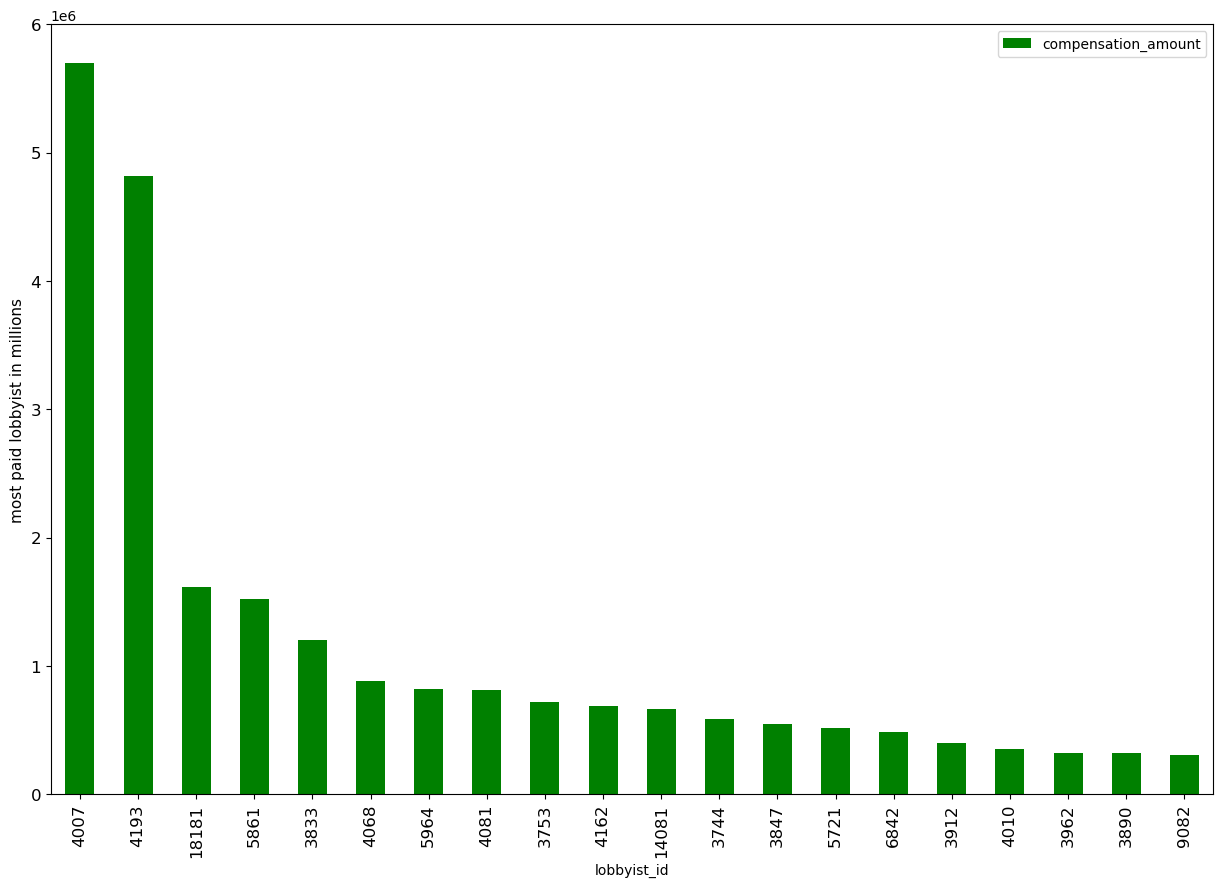

In [53]:
# plotting as a bar chart

lobbyist_most_pay_chart = most_pay_lobbyist.plot.bar(x = 'lobbyist_id', y = 'compensation_amount',figsize = (15,10), color = 'g', fontsize = 12)
plt.ylim(0,6000000)
plt.ylabel("most paid lobbyist in millions", fontsize =11)

## Which politician is receiving the most lobbying funds? - Contribution table

In [54]:
compensation_5y_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5168
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   lobbyist_id              5169 non-null   int64         
 1   lobbyist_first_name      5169 non-null   object        
 2   lobbyist_middle_initial  5169 non-null   object        
 3   lobbyist_last_name       5169 non-null   object        
 4   client_id                5169 non-null   object        
 5   client_name              5169 non-null   object        
 6   compensation_id          5169 non-null   object        
 7   compensation_amount      5169 non-null   float64       
 8   period_start             5169 non-null   datetime64[ns]
 9   period_end               5169 non-null   datetime64[ns]
 10  employer_id              5169 non-null   int64         
 11  year                     5169 non-null   int32         
 12  email                    5169 non-

## What companies spend the most money lobbying? - Compensation table

In [55]:
compensation_5y_df.head()

,lobbyist_id,lobbyist_first_name,lobbyist_middle_initial,lobbyist_last_name,client_id,client_name,compensation_id,compensation_amount,period_start,period_end,...,first_name,last_name,address_1,city,state,zip,country,employer_name,lat,long
0,3912,TERRY,M,GABINSKI,498976702,ANHEUSER BUSCH COMPANIES,1473879510,15000.0,2023-01-01,2023-03-31,...,TERRY,GABINSKI,1817 W. OAKDALE,CHICAGO,IL,60657,United States,TERRY GABINSKI,41.939414,-87.656042
1,3912,TERRY,M,GABINSKI,498976702,ANHEUSER BUSCH COMPANIES,1827908763,15000.0,2022-07-01,2022-09-30,...,TERRY,GABINSKI,1817 W. OAKDALE,CHICAGO,IL,60657,United States,TERRY GABINSKI,41.939414,-87.656042
2,3912,TERRY,M,GABINSKI,498976702,ANHEUSER BUSCH COMPANIES,732332931,15000.0,2022-04-01,2022-06-30,...,TERRY,GABINSKI,1817 W. OAKDALE,CHICAGO,IL,60657,United States,TERRY GABINSKI,41.939414,-87.656042
3,3912,TERRY,M,GABINSKI,498976702,ANHEUSER BUSCH COMPANIES,3111498983,15000.0,2022-01-01,2022-03-31,...,TERRY,GABINSKI,1817 W. OAKDALE,CHICAGO,IL,60657,United States,TERRY GABINSKI,41.939414,-87.656042
4,3912,TERRY,M,GABINSKI,498976702,ANHEUSER BUSCH COMPANIES,3486411985,15000.0,2021-10-01,2021-12-31,...,TERRY,GABINSKI,1817 W. OAKDALE,CHICAGO,IL,60657,United States,TERRY GABINSKI,41.939414,-87.656042


In [56]:
#compensation_df['amount'] = compensation_df['compensation_amount'].astype(float)
companies_most_funds = compensation_5y_df.groupby(["client_name"])["compensation_amount"].sum()
companies_high = companies_most_funds.sort_values(ascending=False)
companies_high =companies_high.head(30)

companies_high

client_name
BRE 312 OWNER LLC AND BRE RIVER NORTH POINT OWNER LLC    975000.0
LYFT                                                     759375.0
NORESCO LLC                                              566000.0
CVS HEALTH                                               442500.0
ACREAGE HOLDINGS                                         405484.0
AMAZON                                                   396000.0
HORIZON THERAPEUTICS                                     390000.0
KATTEN MUCHIN ROSENMAN LLP                               370000.0
ZILLOW GROUP, INC.                                       354000.0
SERVICENOW                                               354000.0
BALLY'S CORPORATION                                      336500.0
WEC ENERGY GROUP, INC.                                   330000.0
SONDER                                                   312500.0
METROPOLITAN HOUSING DEVELOPMENT CORPORATION             309000.0
PHARMACANN, LLC                                          293750.

Text(0, 0.5, 'companies_high')

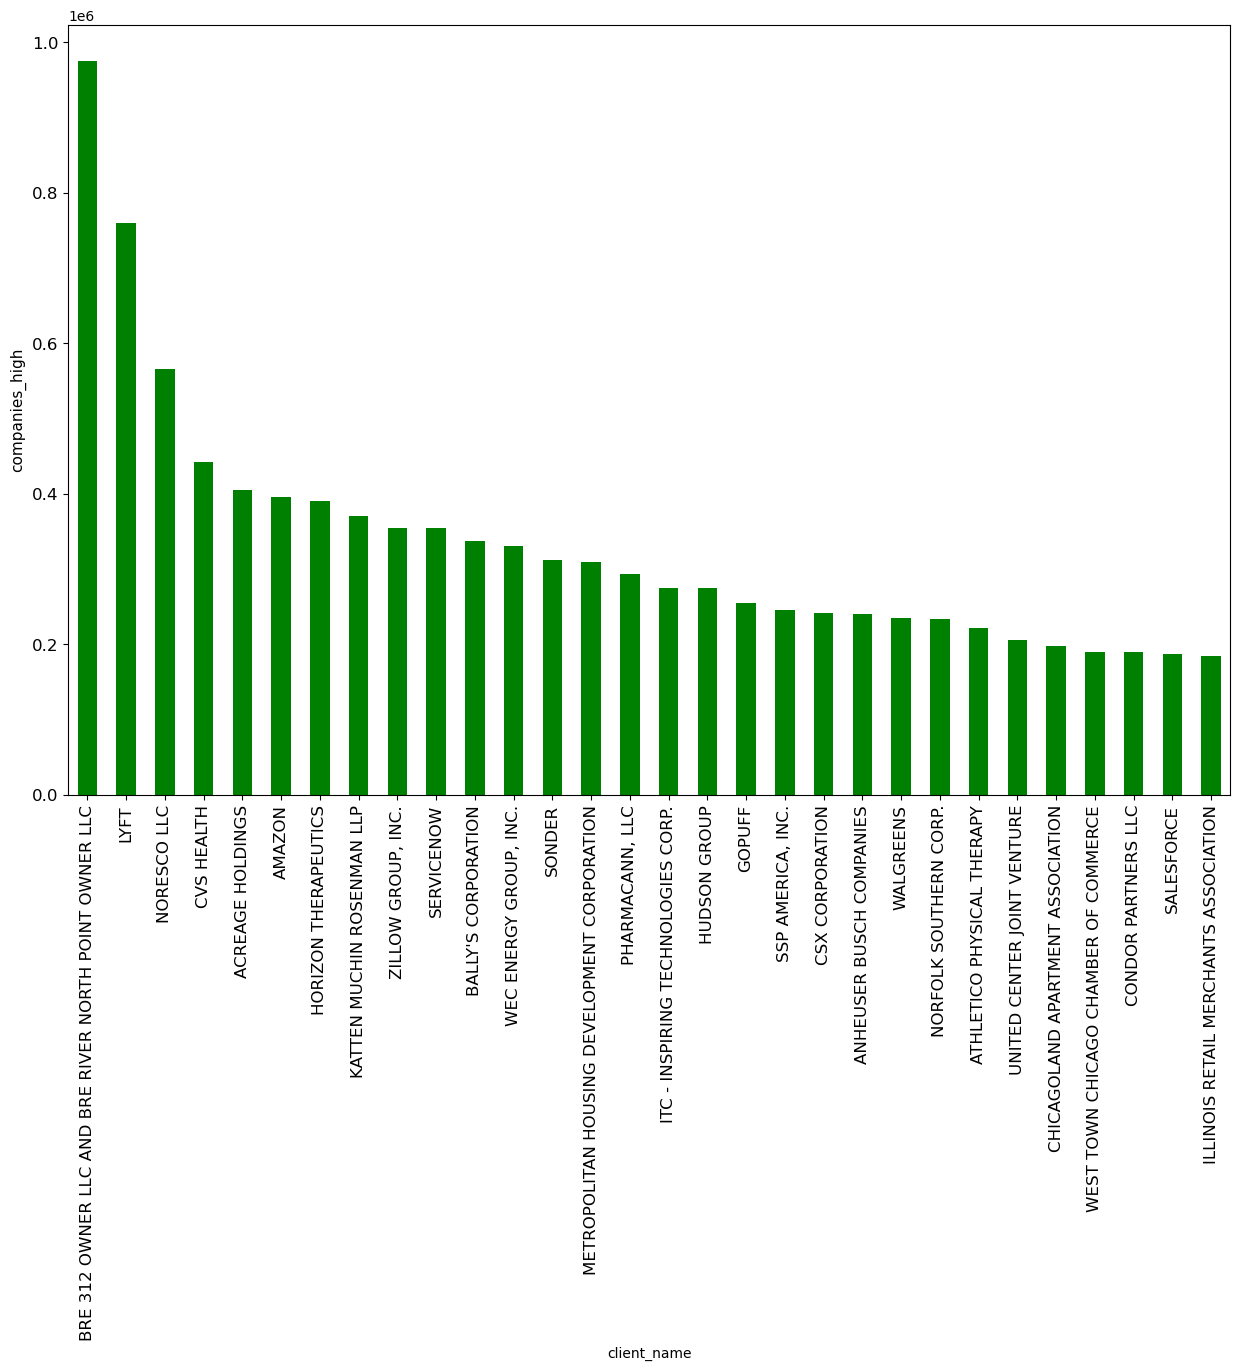

In [57]:
plot_pandas = companies_high.plot.bar(figsize = (15,10), color = 'g', fontsize = 12)
plt.ylabel("companies_high", fontsize =11)

# Creating JSON file for Leaflet Map of Lobbyists

In [58]:
# How many coordinates are missing from final lobbyists dataframe?
lobbyist_final_df.count()

lobbyist_id      352
employer_id      352
year             352
email            352
first_name       352
last_name        352
address_1        352
city             352
state            352
zip              352
country          352
phone            352
fax              352
employer_name    352
lat              340
long             340
dtype: int64

In [59]:
# Drop records without coordinates

lobbyist_map_df = lobbyist_final_df.dropna()
lobbyist_map_df.count()

lobbyist_id      340
employer_id      340
year             340
email            340
first_name       340
last_name        340
address_1        340
city             340
state            340
zip              340
country          340
phone            340
fax              340
employer_name    340
lat              340
long             340
dtype: int64

In [60]:
# Converting final lobbyist dataframe to JavaSript array of objects for Leaflet

lobbyist_df_to_json_dict = lobbyist_map_df.to_dict(orient='records')
#lobbyist_df_to_json_dict

In [61]:
# Write JavaScript array to file
with open("data/lobbyists.json", "w") as outfile:
    json.dump(lobbyist_df_to_json_dict, outfile)

In [62]:
# how many coordinates are missing from final compensation dataframe?
compensation_5y_df.count()

lobbyist_id                5169
lobbyist_first_name        5169
lobbyist_middle_initial    5169
lobbyist_last_name         5169
client_id                  5169
client_name                5169
compensation_id            5169
compensation_amount        5169
period_start               5169
period_end                 5169
employer_id                5169
year                       5169
email                      5169
first_name                 5169
last_name                  5169
address_1                  5169
city                       5169
state                      5169
zip                        5169
country                    5169
employer_name              5169
lat                        4987
long                       4987
dtype: int64

In [63]:
# drop records without coords
compensation_5y_df = compensation_5y_df.dropna()
compensation_5y_df.count()

lobbyist_id                4987
lobbyist_first_name        4987
lobbyist_middle_initial    4987
lobbyist_last_name         4987
client_id                  4987
client_name                4987
compensation_id            4987
compensation_amount        4987
period_start               4987
period_end                 4987
employer_id                4987
year                       4987
email                      4987
first_name                 4987
last_name                  4987
address_1                  4987
city                       4987
state                      4987
zip                        4987
country                    4987
employer_name              4987
lat                        4987
long                       4987
dtype: int64

In [64]:
# converting compensation DF to dict, converting date type to formatted string

compensation_5y_df['period_start'] = compensation_5y_df['period_start'].dt.strftime('%m-%d-%y')
compensation_5y_df['period_end'] = compensation_5y_df['period_end'].dt.strftime('%m-%d-%y')

compensation_df_to_json_dict = compensation_5y_df.to_dict(orient='records')

C:\Users\Enrique\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Enrique\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
compensation_df_to_json_dict

In [65]:
# Write DF to json

with open("data/compensation.json", "w") as outfile:
    json.dump(compensation_df_to_json_dict, outfile)